In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 31
dx = 1.0
d_charge = 4.0
x0 = 4.0
max_iter = 500
d = 0.001
beta_vals = np.linspace(0.05, 0.5, 10)
w = 1.9  

In [2]:
x = np.arange(-N, N+1, dx)
y = np.arange(-N, N+1, dx)
X, Y = np.meshgrid(x, y, indexing='ij')
rho = np.exp(-((X - x0)**2 + Y**2) / d_charge**2) - np.exp(-((X + x0)**2 + Y**2) / d_charge**2)

In [3]:
def compute_S(u, rho):
    lap_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
    lap_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dx**2
    u_c   = u[1:-1, 1:-1]
    rho_c = rho[1:-1, 1:-1]
    S_local = -0.5 * u_c * (lap_x + lap_y) - rho_c * u_c
    return np.sum(S_local) * dx**2

In [4]:
def compute_Sloc(u, rho, i, j):
    Sloc = 0.0
    for ii in (i-1, i, i+1):
        for jj in (j-1, j, j+1):
            lapx = (u[ii+1,jj] + u[ii-1,jj] - 2*u[ii,jj]) / dx**2
            lapy = (u[ii,jj+1] + u[ii,jj-1] - 2*u[ii,jj]) / dx**2
            Sloc -= (0.5*u[ii,jj]*(lapx + lapy) + rho[ii,jj]*u[ii,jj]) * dx**2
    return Sloc

In [5]:
# zad1
u1 = np.zeros_like(X)
S1_vals = []
for it in range(1, max_iter+1):
    u_old = u1.copy()
    u1[1:-1, 1:-1] = (u_old[2:, 1:-1] + u_old[:-2, 1:-1]
                    + u_old[1:-1, 2:] + u_old[1:-1, :-2]
                    + rho[1:-1, 1:-1] * dx**2) / 4.0
    S1_vals.append(compute_S(u1, rho))

In [6]:
# zad2
u2 = np.zeros_like(X)
S2_vals = []
for it in range(1, max_iter+1):
    for i in range(1, 2*N):
        for j in range(1, 2*N):
            u_new = (u2[i+1,j] + u2[i-1,j] + u2[i,j+1] + u2[i,j-1] + rho[i,j]*dx**2) / 4.0
            u2[i,j] = (1 - w)*u2[i,j] + w*u_new
    S2_vals.append(compute_S(u2, rho))

In [7]:
# szuka bete
final_S = []
for beta in beta_vals:
    u_test = np.zeros_like(X)
    for _ in range(1, max_iter+1):
        for i in range(2, 2*N-1):
            for j in range(2, 2*N-1):
                u0 = u_test[i,j]
                u_test[i,j] = u0 + d
                S_plus = compute_Sloc(u_test, rho, i, j)
                u_test[i,j] = u0 - d
                S_minus = compute_Sloc(u_test, rho, i, j)
                grad = (S_plus - S_minus) / (2*d)
                u_test[i,j] = u0 - beta * grad
    final_S.append(compute_S(u_test, rho))

beta_opt = beta_vals[np.argmin(final_S)]
print(f"Optymalne β ≈ {beta_opt:.3f}")

Optymalne β ≈ 0.450


In [8]:
# zad3(2)
u3 = np.zeros_like(X)
S3_vals = []
for _ in range(1, max_iter+1):
    for i in range(2, 2*N-1):
        for j in range(2, 2*N-1):
            u0 = u3[i,j]
            u3[i,j] = u0 + d
            S_plus = compute_Sloc(u3, rho, i, j)
            u3[i,j] = u0 - d
            S_minus = compute_Sloc(u3, rho, i, j)
            grad = (S_plus - S_minus) / (2*d)
            u3[i,j] = u0 - beta_opt * grad
    S3_vals.append(compute_S(u3, rho))

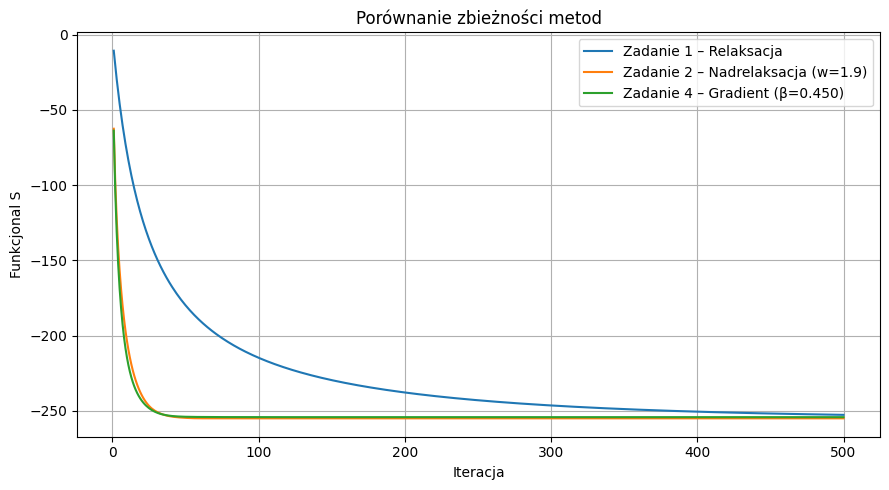

In [9]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(1, max_iter+1), S1_vals, label='Zadanie 1 – Relaksacja')
plt.plot(np.arange(1, max_iter+1), S2_vals, label='Zadanie 2 – Nadrelaksacja (w=1.9)')
plt.plot(np.arange(1, max_iter+1), S3_vals, label=f'Zadanie 4 – Gradient (β={beta_opt:.3f})')
plt.xlabel('Iteracja')
plt.ylabel('Funkcjonal S')
plt.title('Porównanie zbieżności metod')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()